<a href="https://colab.research.google.com/github/AbhyanandSharma2005/ML-model-practice-on-real-data/blob/main/K-MeanClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mall_Customers.csv not found. Creating a synthetic dataset for demonstration.
--- Original Mall Customer Data (First 5 Rows) ---
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   49                  33                     100
1           2  Female   56                  38                      72
2           3    Male   66                  30                      89
3           4    Male   69                  45                      82
4           5    Male   49                  27                     100

Shape of data: (200, 5)

Features selected for clustering (first 5 rows):
[[ 33 100]
 [ 38  72]
 [ 30  89]
 [ 45  82]
 [ 27 100]]

--- Scaled Features (First 5 Rows) ---
[[-1.09387023  2.08881125]
 [-0.89720172  0.96385039]
 [-1.21187133  1.64686234]
 [-0.62186581  1.36562212]
 [-1.32987243  2.08881125]]


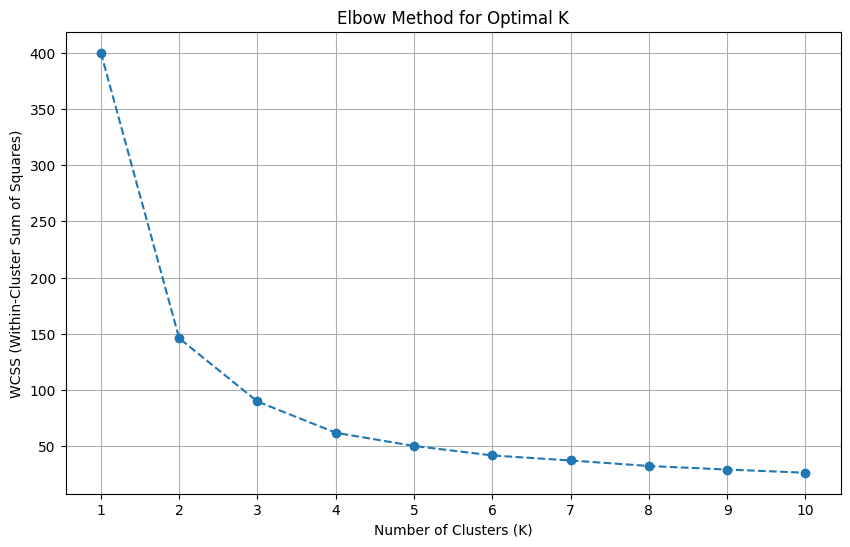


--- K-Means Clustering Results (Optimal K = 5) ---
First 5 rows with cluster assignments:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   49                  33                     100   
1           2  Female   56                  38                      72   
2           3    Male   66                  30                      89   
3           4    Male   69                  45                      82   
4           5    Male   49                  27                     100   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  

Centroids of the clusters (original scale):
   Annual Income (k$)  Spending Score (1-100)
0           49.707317               38.390244
1           90.145455               19.600000
2           39.282051               67.153846
3           78.277778               49.388889
4           28.137931               88.034483


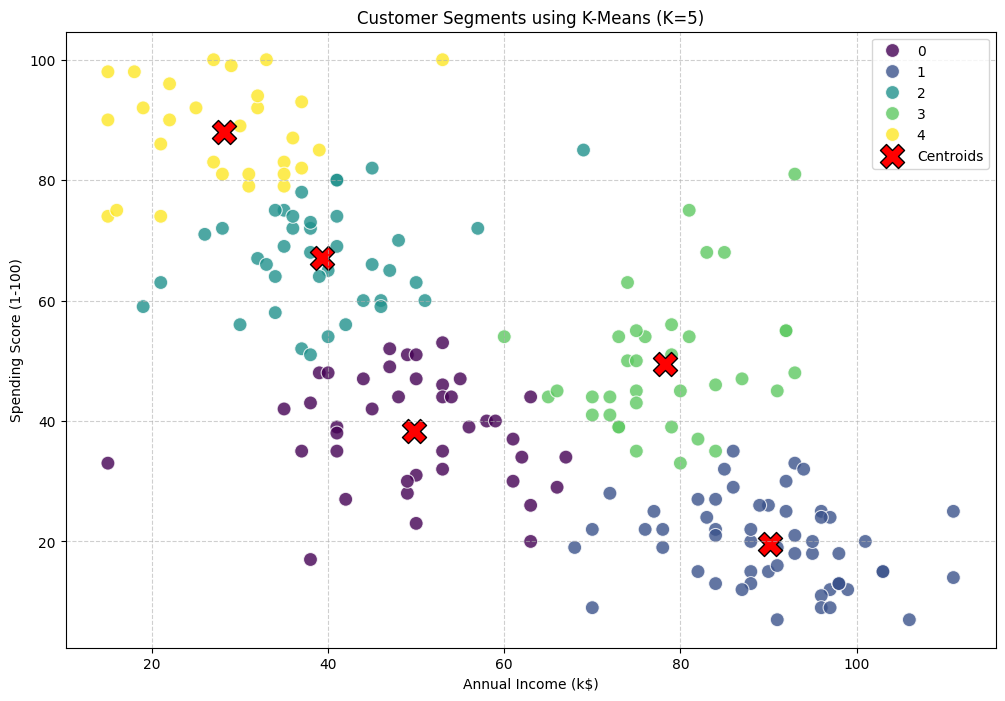


--- Cluster Characteristics (Mean Values) ---
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 49.707317               38.390244
1                 90.145455               19.600000
2                 39.282051               67.153846
3                 78.277778               49.388889
4                 28.137931               88.034483


In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('Mall_Customers.csv')
except FileNotFoundError:
    print("Mall_Customers.csv not found. Creating a synthetic dataset for demonstration.")
    np.random.seed(42)
    data = {
        'CustomerID': range(1, 201),
        'Gender': np.random.choice(['Male', 'Female'], 200),
        'Age': np.random.randint(18, 70, 200),
        'Annual Income (k$)': np.concatenate([
            np.random.normal(30, 10, 50),
            np.random.normal(60, 15, 50),
            np.random.normal(90, 10, 50),
            np.random.normal(45, 8, 25),
            np.random.normal(75, 12, 25)
        ]),
        'Spending Score (1-100)': np.concatenate([
            np.random.normal(80, 10, 50),
            np.random.normal(40, 10, 50),
            np.random.normal(20, 8, 50),
            np.random.normal(60, 10, 25),
            np.random.normal(50, 15, 25)
        ])
    }
    df = pd.DataFrame(data)
    df['Spending Score (1-100)'] = np.clip(df['Spending Score (1-100)'].round().astype(int), 1, 100)
    df['Annual Income (k$)'] = np.clip(df['Annual Income (k$)'].round().astype(int), 15, 140)


print("--- Original Mall Customer Data (First 5 Rows) ---")
print(df.head())
print("\nShape of data:", df.shape)

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

print(f"\nFeatures selected for clustering (first 5 rows):\n{X[:5]}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n--- Scaled Features (First 5 Rows) ---")
print(X_scaled[:5])

wcss = []
k_range = range(1, 11)

for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

optimal_k = 5

kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans_final.fit_predict(X_scaled)

centroids_scaled = kmeans_final.cluster_centers_
centroids_original_scale = scaler.inverse_transform(centroids_scaled)

print(f"\n--- K-Means Clustering Results (Optimal K = {optimal_k}) ---")
print("First 5 rows with cluster assignments:")
print(df.head())

print("\nCentroids of the clusters (original scale):")
centroids_df = pd.DataFrame(centroids_original_scale, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print(centroids_df)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='viridis',
    s=100,
    alpha=0.8,
    legend='full'
)
plt.scatter(
    centroids_original_scale[:, 0],
    centroids_original_scale[:, 1],
    marker='X',
    s=300,
    color='red',
    label='Centroids',
    edgecolors='black'
)
plt.title(f'Customer Segments using K-Means (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print("\n--- Cluster Characteristics (Mean Values) ---")
print(df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())